## Proof of Concept Model Selection

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.externals import joblib
%matplotlib inline

In [2]:
ca = pd.read_excel('C://Users/Boian Etropolski/Jupyter Notebooks/College Predictions Notebook/CA Master Sheet.xlsx')

In [3]:
pd.__version__

'0.22.0'

In [4]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24629 entries, 0 to 24628
Data columns (total 16 columns):
Profile         24624 non-null object
College_Name    24629 non-null object
HS_Type         23806 non-null object
HS_State        23123 non-null object
GPA_UW          23996 non-null float64
GPA_W           19769 non-null float64
SAT_M           19955 non-null float64
SAT_CR          19955 non-null float64
SAT_W           19883 non-null float64
ACT             13165 non-null float64
Class_Rank      24220 non-null object
Status          24623 non-null object
EA/ED           3684 non-null object
Legacy          994 non-null object
Athlete         692 non-null object
Year            24629 non-null int64
dtypes: float64(6), int64(1), object(9)
memory usage: 3.0+ MB


In [5]:
ca.head(15)

,Profile,College_Name,HS_Type,HS_State,GPA_UW,GPA_W,SAT_M,SAT_CR,SAT_W,ACT,Class_Rank,Status,EA/ED,Legacy,Athlete,Year
0,1w234e,UCLA,Public,NC,4.00,5.00,800.0,800.0,800.0,NaN,Top 10%,Accepted,NaN,NaN,X,2014
1,25X87,UCLA,Private,CA,3.70,4.10,700.0,730.0,730.0,NaN,Top 25%,Denied,NaN,NaN,NaN,2014
2,2WFZQ,UCLA,Public,VA,4.00,4.42,660.0,660.0,690.0,30.0,7 of 410,Accepted,NaN,NaN,NaN,2014
3,31terry,UCLA,Public,CA,4.00,4.40,680.0,680.0,670.0,32.0,3 of 250,Applied,NaN,NaN,NaN,2014
4,36g9X,UCLA,Public,NV,4.00,4.60,700.0,770.0,800.0,NaN,4 of 446,Accepted,NaN,NaN,NaN,2014
5,3bzrK,UCLA,Public,CA,3.53,4.03,620.0,570.0,520.0,NaN,56 of 443,Applied,NaN,NaN,NaN,2014
6,3T6XQ,UCLA,Public,CA,4.00,4.48,NaN,NaN,NaN,34.0,1 of 305,Accepted,NaN,NaN,NaN,2014
7,3uErj,UCLA,Public,CA,3.56,3.72,570.0,630.0,630.0,27.0,DR,Applied,NaN,NaN,NaN,2014
8,4RtYo,UCLA,Public,CA,3.68,3.74,570.0,640.0,650.0,26.0,27 of 112,Denied,NaN,NaN,NaN,2014
9,5E9R2,UCLA,Private,NaN,3.75,NaN,NaN,NaN,NaN,18.0,5 of 22,Applied,NaN,NaN,NaN,2014


In [6]:
ca.tail(15)

,Profile,College_Name,HS_Type,HS_State,GPA_UW,GPA_W,SAT_M,SAT_CR,SAT_W,ACT,Class_Rank,Status,EA/ED,Legacy,Athlete,Year
24614,WPkZW,Johns Hopkins,Public,GA,4.00,4.35,720.0,670.0,600.0,34.0,30 of 300,Denied,NaN,NaN,NaN,2018
24615,wsihlelf,Johns Hopkins,Public,NY,3.96,3.96,740.0,690.0,730.0,NaN,23 of 160,Accepted,X,NaN,NaN,2018
24616,X9n6d,Johns Hopkins,Parochial,CA,3.80,4.30,530.0,500.0,NaN,24.0,Top 10%,Applied,NaN,NaN,NaN,2018
24617,XAHtz,Johns Hopkins,Public,FL,3.95,4.96,730.0,680.0,NaN,33.0,Top 10%,Applied,NaN,NaN,NaN,2018
24618,xixi,Johns Hopkins,Public,MD,4.00,4.24,800.0,740.0,800.0,NaN,DR,Applied,NaN,NaN,NaN,2018
24619,XK96o,Johns Hopkins,NaN,NY,4.00,4.50,750.0,750.0,760.0,NaN,6 of 467,Applied,NaN,NaN,NaN,2018
24620,XQdP2,Johns Hopkins,Parochial,CA,3.39,3.82,710.0,660.0,700.0,NaN,DR,Applied,NaN,NaN,NaN,2018
24621,XRDVp,Johns Hopkins,Public,NY,4.00,5.00,680.0,670.0,730.0,NaN,15 of 293,Applied,NaN,NaN,NaN,2018
24622,Y7RbG,Johns Hopkins,Public,VA,4.00,5.00,800.0,750.0,800.0,36.0,4 of 326,Applied,NaN,NaN,NaN,2018
24623,YDfBy,Johns Hopkins,Private,CA,3.75,4.15,NaN,NaN,NaN,32.0,Top 10%,Wait-Listed,NaN,NaN,NaN,2018


In [7]:
ca = ca.drop('Profile', 1)
ca.head()

,College_Name,HS_Type,HS_State,GPA_UW,GPA_W,SAT_M,SAT_CR,SAT_W,ACT,Class_Rank,Status,EA/ED,Legacy,Athlete,Year
0,UCLA,Public,NC,4.0,5.00,800.0,800.0,800.0,NaN,Top 10%,Accepted,NaN,NaN,X,2014
1,UCLA,Private,CA,3.7,4.10,700.0,730.0,730.0,NaN,Top 25%,Denied,NaN,NaN,NaN,2014
2,UCLA,Public,VA,4.0,4.42,660.0,660.0,690.0,30.0,7 of 410,Accepted,NaN,NaN,NaN,2014
3,UCLA,Public,CA,4.0,4.40,680.0,680.0,670.0,32.0,3 of 250,Applied,NaN,NaN,NaN,2014
4,UCLA,Public,NV,4.0,4.60,700.0,770.0,800.0,NaN,4 of 446,Accepted,NaN,NaN,NaN,2014


In [8]:
ca.College_Name.unique()


array(['UCLA', 'NYU', 'UC Berkeley', 'Stanford', 'Cornell U',
       'U Michigan', 'U SoCal', 'U-Penn', 'Boston U', 'UNC Chapel Hill',
       'Harvard', 'Brown', 'Duke', 'UCSD', 'UVA', 'UCSB', 'Yale',
       'Northwestern', 'Vanderbilt', 'Princeton', 'U Chicago',
       'Northeastern', 'UC Davis', 'BC', 'Georgetown U', 'U Maryland',
       'Georgia Tech', 'Wash U', 'MIT', 'Johns Hopkins'], dtype=object)

In [9]:
ca.Status.unique()

array(['Accepted', 'Denied', 'Applied', 'Will Attend', 'Withdrawn',
       'Wait-Listed', 'Deferred', nan], dtype=object)

In [10]:
ca.HS_State.unique(), "# of territories: {}".format(ca.HS_State.unique().size)

(array(['NC', 'CA', 'VA', 'NV', nan, 'NY', 'IL', 'PA', 'NE', 'WA', 'FL',
        'CO', 'GA', 'OR', 'OH', 'DC', 'KS', 'TX', 'NJ', 'IA', 'IN', 'HI',
        'MD', 'MI', 'TN', 'MA', 'AZ', 'AK', 'AR', 'ME', 'CT', 'UT', 'KY',
        'NM', 'MO', 'MN', 'ON', 'OK', 'MT', 'WI', 'LA', 'VT', 'NH', 'AL',
        'SC', 'RI', 'PR', 'ID', 'WV', 'BC', 'VI', 'GU', 'DE', 'WY', 'MS',
        'SD', 'AE', 'AS', 'ND'], dtype=object), '# of territories: 59')

## Key
###### DC = District of Columbia
###### GU = Guam
###### PR = Puerto Rico
###### nan = NotANumber
###### AE = Armed Forces
###### AS = American Samoa 
###### BC = British Columbia
###### ON = Ontario
###### VI = Virgin Islands

In [11]:
ca.Class_Rank.unique()

array(['Top 10%', 'Top 25%', '7 of 410', ..., '14 of 509', '1 of 501',
       '23 of 160'], dtype=object)

## Unsatisfactory uniqueness -- isolate patterns

In [12]:
s = ca.Class_Rank.str.cat(sep=', ')
words = nltk.tokenize.word_tokenize(s)
fdist = nltk.FreqDist(words)

fdist.most_common(10)

[(',', 24219),
 ('of', 12906),
 ('%', 6336),
 ('Top', 6287),
 ('DR', 4978),
 ('10', 4388),
 ('1', 2117),
 ('25', 1880),
 ('2', 789),
 ('50', 719)]

In [13]:
stopwords = set(nltk.corpus.stopwords.words('english'))

words = [word for word in words if len(word) > 1 and word.isalpha() or word == '10' or word == '25' or word == '50']

In [14]:
fdist = nltk.FreqDist(words)
fdist.most_common(10)

# success !

[('of', 12906),
 ('Top', 6287),
 ('DR', 4978),
 ('10', 4388),
 ('25', 1880),
 ('50', 719),
 ('Bottom', 49)]

In [15]:
boolean = {'X': True, np.NaN: False}
boolean2 = {'Accepted': True, 'Will Attend': True, 'Applied': False, 'Wait-Listed': False, 'Denied': False, 'Withdrawn': False, \
            'Deferred': False, np.nan: False}

ca['EA/ED'] = ca['EA/ED'].replace(boolean)
ca['Legacy'] = ca['Legacy'].replace(boolean)
ca['Athlete'] = ca['Athlete'].replace(boolean)
ca['Status'] = ca['Status'].replace(boolean2)
ca['Class_Rank'] = ca['Class_Rank'].replace('DR', np.NaN)

In [16]:
ca.head()

,College_Name,HS_Type,HS_State,GPA_UW,GPA_W,SAT_M,SAT_CR,SAT_W,ACT,Class_Rank,Status,EA/ED,Legacy,Athlete,Year
0,UCLA,Public,NC,4.0,5.00,800.0,800.0,800.0,NaN,Top 10%,True,False,False,True,2014
1,UCLA,Private,CA,3.7,4.10,700.0,730.0,730.0,NaN,Top 25%,False,False,False,False,2014
2,UCLA,Public,VA,4.0,4.42,660.0,660.0,690.0,30.0,7 of 410,True,False,False,False,2014
3,UCLA,Public,CA,4.0,4.40,680.0,680.0,670.0,32.0,3 of 250,False,False,False,False,2014
4,UCLA,Public,NV,4.0,4.60,700.0,770.0,800.0,NaN,4 of 446,True,False,False,False,2014


In [17]:
def classRanks(x):
    nums = ''
    rank = 0
    if x is np.nan:
        pass
    elif "of" in x:
        split = x.split('of')
        for string in split:
            nums = re.findall('\d+', x)
        rank = nums
        rank = 1 - (int(rank[0]) / int(rank[1]))
    elif "Top" or "Bottom" in x:
        num = re.findall('\d+', x)
        rank = num
        rank = 1 - (int(rank[0])/100)
    return rank

In [18]:
ca.Class_Rank = ca['Class_Rank'].apply(classRanks)

In [19]:
ca.head(10)

,College_Name,HS_Type,HS_State,GPA_UW,GPA_W,SAT_M,SAT_CR,SAT_W,ACT,Class_Rank,Status,EA/ED,Legacy,Athlete,Year
0,UCLA,Public,NC,4.00,5.00,800.0,800.0,800.0,NaN,0.900000,True,False,False,True,2014
1,UCLA,Private,CA,3.70,4.10,700.0,730.0,730.0,NaN,0.750000,False,False,False,False,2014
2,UCLA,Public,VA,4.00,4.42,660.0,660.0,690.0,30.0,0.982927,True,False,False,False,2014
3,UCLA,Public,CA,4.00,4.40,680.0,680.0,670.0,32.0,0.988000,False,False,False,False,2014
4,UCLA,Public,NV,4.00,4.60,700.0,770.0,800.0,NaN,0.991031,True,False,False,False,2014
5,UCLA,Public,CA,3.53,4.03,620.0,570.0,520.0,NaN,0.873589,False,False,False,False,2014
6,UCLA,Public,CA,4.00,4.48,NaN,NaN,NaN,34.0,0.996721,True,False,False,False,2014
7,UCLA,Public,CA,3.56,3.72,570.0,630.0,630.0,27.0,0.000000,False,False,False,False,2014
8,UCLA,Public,CA,3.68,3.74,570.0,640.0,650.0,26.0,0.758929,False,False,False,False,2014
9,UCLA,Private,NaN,3.75,NaN,NaN,NaN,NaN,18.0,0.772727,False,False,False,False,2014


In [20]:
# Ready for trials

ca = ca.dropna() 
unprocessed = ca # important! I will be returning to this dataframe state later

In [21]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7174 entries, 2 to 24626
Data columns (total 15 columns):
College_Name    7174 non-null object
HS_Type         7174 non-null object
HS_State        7174 non-null object
GPA_UW          7174 non-null float64
GPA_W           7174 non-null float64
SAT_M           7174 non-null float64
SAT_CR          7174 non-null float64
SAT_W           7174 non-null float64
ACT             7174 non-null float64
Class_Rank      7174 non-null float64
Status          7174 non-null bool
EA/ED           7174 non-null bool
Legacy          7174 non-null bool
Athlete         7174 non-null bool
Year            7174 non-null int64
dtypes: bool(4), float64(7), int64(1), object(3)
memory usage: 700.6+ KB


In [22]:
x = ca[['GPA_UW', 'GPA_W', 'SAT_M', 'SAT_CR', 'SAT_W', 'ACT', 'Class_Rank', 'EA/ED', 'Legacy', 'Athlete', 'Year']]
y = ca.Status

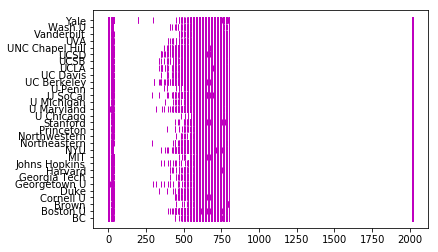

In [23]:
plt.plot(x, ca.College_Name, 'm|')

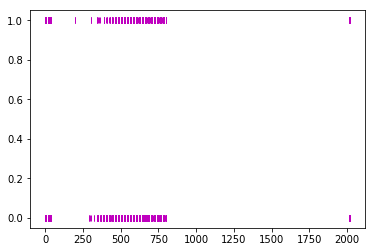

In [24]:
plt.plot(x, ca.Status, 'm|')

## X needs to be normalized

In [25]:
x = ca[['GPA_UW', 'GPA_W', 'SAT_M', 'SAT_CR', 'SAT_W', 'ACT', 'Class_Rank', 'Year']]

scaler = StandardScaler()
scaler.fit(x)
ca[['GPA_UW', 'GPA_W', 'SAT_M', 'SAT_CR', 'SAT_W', 'ACT', 'Class_Rank', 'Year']] = scaler.transform(x)

In [26]:
# scale twice: once to standardize (conform to Gaussian) and once to normalize (center and resize around 0)

scaler.fit(x)
ca[['GPA_UW', 'GPA_W', 'SAT_M', 'SAT_CR', 'SAT_W', 'ACT', 'Class_Rank', 'Year']] = scaler.transform(x)

In [27]:
ca.head()

,College_Name,HS_Type,HS_State,GPA_UW,GPA_W,SAT_M,SAT_CR,SAT_W,ACT,Class_Rank,Status,EA/ED,Legacy,Athlete,Year
2,UCLA,Public,VA,0.904760,0.445021,-0.308011,-0.027872,0.239736,-0.088269,0.663425,True,False,False,False,-1.456542
3,UCLA,Public,CA,0.904760,0.397436,-0.062319,0.212835,0.000277,0.458806,0.677855,False,False,False,False,-1.456542
7,UCLA,Public,CA,-0.791542,-1.220471,-1.413628,-0.388934,-0.478642,-0.908881,-2.132484,False,False,False,False,-1.456542
8,UCLA,Public,CA,-0.328915,-1.172885,-1.413628,-0.268580,-0.239182,-1.182418,0.026268,False,False,False,False,-1.456542
11,UCLA,Public,CA,0.904760,-0.078419,0.429066,-0.509288,0.598925,0.732344,0.685441,True,False,False,False,-1.456542


In [28]:
# reset

x = ca[['GPA_UW', 'GPA_W', 'SAT_M', 'SAT_CR', 'SAT_W', 'ACT', 'Class_Rank', 'EA/ED', 'Legacy', 'Athlete', 'Year']]
y = ca.Status

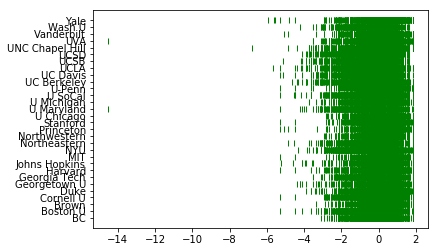

In [29]:
plt.plot(x, ca.College_Name, 'g|') 
plt.show()

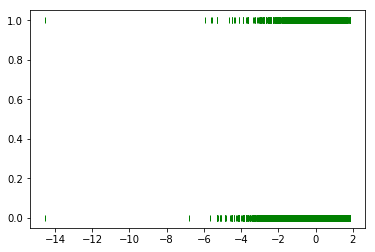

In [30]:
plt.plot(x, ca.Status, 'g|') 
plt.show()

In [31]:
# compare against Class_Rank: Athlete and Legacy should not be negatively correlated
# too little data

ca.corr(method='pearson', min_periods=7174)

,GPA_UW,GPA_W,SAT_M,SAT_CR,SAT_W,ACT,Class_Rank,Status,EA/ED,Legacy,Athlete,Year
GPA_UW,1.000000,0.668585,0.353427,0.305773,0.356772,0.381886,0.333164,0.130442,0.021206,0.002047,-0.040219,0.039649
GPA_W,0.668585,1.000000,0.401436,0.362345,0.380754,0.432817,0.334376,0.084479,0.048158,0.033941,-0.018215,0.046440
SAT_M,0.353427,0.401436,1.000000,0.561117,0.607616,0.755584,0.076647,0.063589,0.071365,0.024661,-0.012350,-0.016967
SAT_CR,0.305773,0.362345,0.561117,1.000000,0.734750,0.759965,0.070123,0.085606,0.072071,0.025111,-0.055990,-0.042753
SAT_W,0.356772,0.380754,0.607616,0.734750,1.000000,0.717140,0.039833,0.113172,0.066110,0.025654,-0.073646,-0.032520
ACT,0.381886,0.432817,0.755584,0.759965,0.717140,1.000000,0.079250,0.082774,0.075080,0.034680,-0.038432,-0.025713
Class_Rank,0.333164,0.334376,0.076647,0.070123,0.039833,0.079250,1.000000,0.074558,-0.034686,-0.001334,-0.028328,0.001780
Status,0.130442,0.084479,0.063589,0.085606,0.113172,0.082774,0.074558,1.000000,0.055767,0.033853,-0.015933,-0.058937
EA/ED,0.021206,0.048158,0.071365,0.072071,0.066110,0.075080,-0.034686,0.055767,1.000000,0.120695,0.042643,0.031296
Legacy,0.002047,0.033941,0.024661,0.025111,0.025654,0.034680,-0.001334,0.033853,0.120695,1.000000,0.050178,-0.020818


## Logistic Regression
#### Admittance Status

In [32]:
# I will use the default l2 penalty because I want to track all the features

lr = LogisticRegression()

lr.fit(x, y)

lr.predict(x)

array([False, False, False, ..., False, False, False])

In [33]:
lr.score(x, y)

0.7769724003345414

#### College Threshold

In [34]:
# reset

x = ca[['GPA_UW', 'GPA_W', 'SAT_M', 'SAT_CR', 'SAT_W', 'ACT', 'Class_Rank', 'EA/ED', 'Legacy', 'Athlete', 'Year']]
y = ca.College_Name

In [35]:
lr2 = LogisticRegression(solver='lbfgs', multi_class='multinomial')

lr2.fit(x, y)

lr2.predict(x)

array(['UC Berkeley', 'Stanford', 'UCSB', ..., 'UC Berkeley', 'Duke',
       'UCLA'], dtype=object)

In [36]:
lr2.score(x, y)

0.10607750209088375

## Random Forest
#### Admittance Status

In [37]:
# sklearn's RFs do not support non-binary categorical data

x = ca[['GPA_UW', 'GPA_W', 'SAT_M', 'SAT_CR', 'SAT_W', 'ACT', 'Class_Rank', 'EA/ED', 'Legacy', 'Athlete', 'Year']]
y = ca.Status

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [38]:
# x is mostly numerical, but y must be categorical; hence, the classifier

rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(x_train, y_train)
y_hat = rfc.predict(x_test)

In [39]:
accuracy_score(y_test, y_hat)

0.7770034843205574

In [40]:
y_test.count()

1435

In [41]:
# strong true negative / weak true positive (most likely due to small data size [7174rows/30colleges=239rows/college])
# supporting this is the fact that increasing the data from ~4k to ~7k rows increased the accuracy from 0.70 to 0.77,
# as well as the fact that sensitivity > specificity

# accuracy: 1115 / 1435 = 0.77839
#sensitivity: 1011 / 1115 = 0.90672
#specificity: 214 / 320 = 0.66875

confusion_matrix(y_test, y_hat)

array([[1011,  104],
       [ 216,  104]], dtype=int64)

#### College Threshold

In [42]:
x = ca[['GPA_UW', 'GPA_W', 'SAT_M', 'SAT_CR', 'SAT_W', 'ACT', 'Class_Rank', 'EA/ED', 'Legacy', 'Athlete', 'Year']]
y = ca.College_Name

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [43]:
rfc2 = RandomForestClassifier(criterion='entropy')
rfc2.fit(x_train, y_train)
y_hat2 = rfc2.predict(x_test)

In [44]:
accuracy_score(y_test, y_hat2)

0.032752613240418116

## MLP (MultiLayerPerceptron)

In [45]:
x = ca[['GPA_UW', 'GPA_W', 'SAT_M', 'SAT_CR', 'SAT_W', 'ACT', 'Class_Rank', 'EA/ED', 'Legacy', 'Athlete', 'Year']]
y = ca.Status

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

mlp = MLPClassifier(hidden_layer_sizes=(3), activation='relu', max_iter = 300)

mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [46]:
# in this case, all the false positives were filtered out, along with all the true positives! 
# in other words, the MLP did not distinguish values, only the silhouette of a feature border

confusion_matrix(y_test, mlp.predict(x_test))

array([[1115,    0],
       [ 320,    0]], dtype=int64)

In [47]:
# equivalent predictive accuracy compared to the RFC

mlp.score(x_test, y_test)

0.7770034843205574

In [48]:
mlp.coefs_

[array([[-3.59221792e-01, -4.74935523e-01, -7.68490121e-01],
        [ 5.02034286e-01, -5.86661117e-01, -2.26373531e-01],
        [-2.57065252e-01, -3.47991964e-02,  9.12757321e-01],
        [ 4.02665773e-03, -6.38052499e-01, -5.30668244e-01],
        [ 4.36456608e-02, -4.86937494e-01, -3.00549858e-02],
        [ 1.36863183e-01,  2.31729923e-01,  6.56938117e-01],
        [-7.11965223e-02, -2.83213938e-01,  2.71476483e-01],
        [-7.61246047e-02, -3.66669449e-01, -2.86634472e-01],
        [-3.03354402e-01,  4.18249409e-02, -1.18892046e-01],
        [ 3.87700915e-01,  4.83970848e-01, -2.65999539e-04],
        [ 2.98242911e-01,  2.57584103e-01,  6.73557459e-01]]),
 array([[-0.53058717],
        [-0.34949734],
        [-0.13542399]])]

## Preprocessing Categorical Features w/ OneHotEncoder

In [49]:
ca.College_Name.unique()

array(['UCLA', 'NYU', 'UC Berkeley', 'Stanford', 'Cornell U',
       'U Michigan', 'U SoCal', 'U-Penn', 'Boston U', 'UNC Chapel Hill',
       'Harvard', 'Brown', 'Duke', 'UCSD', 'UVA', 'UCSB', 'Yale',
       'Northwestern', 'Vanderbilt', 'Princeton', 'U Chicago',
       'Northeastern', 'UC Davis', 'BC', 'Georgetown U', 'U Maryland',
       'Georgia Tech', 'Wash U', 'MIT', 'Johns Hopkins'], dtype=object)

In [50]:
# add 30 columns (1 for each college) 

ca = pd.concat([ca,pd.DataFrame(columns=['UCLA', 'NYU', 'UC_Berkeley', 'Stanford', 'Cornell_U','U_Michigan', 'U_SoCal',
'U_Penn', 'Boston_U', 'UNC_Chapel_Hill', 'Harvard', 'Brown', 'Duke', 'UCSD', 'UVA', 'UCSB', 'Yale', 'Northwestern',
'Vanderbilt', 'Princeton', 'U Chicago', 'Northeastern', 'UC_Davis', 'BC', 'Georgetown_U', 'U_Maryland','Georgia_Tech',
'Wash_U', 'MIT', 'Johns_Hopkins'])])

In [51]:
# add 59 columns (1 for each territory, including nan)

ca = pd.concat([ca,pd.DataFrame(columns=['NC', 'CA', 'VA', 'NV', 'NY', 'IL', 'PA', 'NE', 'WA', 'FL',
        'CO', 'GA', 'OR', 'OH', 'DC', 'KS', 'TX', 'NJ', 'IA', 'IN', 'HI',
        'MD', 'MI', 'TN', 'MA', 'AZ', 'AK', 'AR', 'ME', 'CT', 'UT', 'KY',
        'NM', 'MO', 'MN', 'ON', 'OK', 'MT', 'WI', 'LA', 'VT', 'NH', 'AL',
        'SC', 'RI', 'PR', 'ID', 'WV', 'BC', 'VI', 'GU', 'DE', 'WY', 'MS',
        'SD', 'AE', 'AS', 'ND', np.nan])])

In [52]:
ca.HS_Type.unique()

array(['Public', 'Private', 'Parochial', 'Home'], dtype=object)

In [53]:
# add 4 columns (1 for each type of school)

ca = pd.concat([ca,pd.DataFrame(columns=['Public', 'Private', 'Parochial', 'Home'])])

In [54]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7174 entries, 2 to 24626
Columns: 107 entries, ACT to Home
dtypes: float64(8), object(99)
memory usage: 5.9+ MB


In [55]:
ca.College_Name, ca.HS_Type, ca.HS_State = ca.College_Name.astype('category'), ca.HS_Type.astype('category'), ca.HS_State.astype('category')

In [56]:
# assign College_Name values to each new college column

cn_factors = ca.College_Name.factorize()[0].reshape(-1,1)

In [57]:
ohe = OneHotEncoder(n_values=30, sparse=False, handle_unknown='ignore')

ohe.fit_transform(cn_factors)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [58]:
ca[['UCLA', 'NYU', 'UC_Berkeley', 'Stanford', 'Cornell_U','U_Michigan', 'U_SoCal', 'U_Penn', 'Boston_U', 'UNC_Chapel_Hill', 'Harvard',
'Brown', 'Duke', 'UCSD', 'UVA', 'UCSB', 'Yale', 'Northwestern', 'Vanderbilt', 'Princeton', 'U Chicago', 'Northeastern', 'UC_Davis',
'BC', 'Georgetown_U', 'U_Maryland','Georgia_Tech', 'Wash_U', 'MIT', 'Johns_Hopkins']] = ohe.fit_transform(cn_factors) 

In [59]:
# assign HS_State values to each new territory column

hs_t_factors = ca.HS_State.factorize()[0].reshape(-1,1)

ohe2 = OneHotEncoder(n_values=59, sparse=False)

ca[['NC', 'CA', 'VA', 'NV', 'NY', 'IL', 'PA', 'NE', 'WA', 'FL', 'CO', 'GA', 'OR', 'OH', 'DC', 'KS', 'TX', 'NJ', 'IA', 'IN', 'HI',
    'MD', 'MI', 'TN', 'MA', 'AZ', 'AK', 'AR', 'ME', 'CT', 'UT', 'KY', 'NM', 'MO', 'MN', 'ON', 'OK', 'MT', 'WI', 'LA', 'VT', 'NH',
    'AL', 'SC', 'RI', 'PR', 'ID', 'WV', 'BC', 'VI', 'GU', 'DE', 'WY', 'MS', 'SD', 'AE', 'AS', 'ND', np.nan]] = ohe2.fit_transform(hs_t_factors)

In [60]:
# assign HS_Type values to each new school type column

hs_st_factors = ca.HS_Type.factorize()[0].reshape(-1,1)

ohe3 = OneHotEncoder(n_values=4, sparse=False)

ca[['Public', 'Private', 'Parochial', 'Home']] = ohe3.fit_transform(hs_st_factors)

In [61]:
ca.drop(np.nan, 1, inplace=True)

In [62]:
ca.head(10)

,ACT,AE,AK,Athlete,BC,Boston_U,Brown,CA,Class_Rank,College_Name,...,VI,VT,WA,WI,WV,WY,Public,Private,Parochial,Home
2,-0.088269,0.0,0.0,False,0.0,0.0,0.0,0.0,0.663425,UCLA,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.458806,0.0,0.0,False,0.0,0.0,0.0,1.0,0.677855,UCLA,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,-0.908881,0.0,0.0,False,0.0,0.0,0.0,1.0,-2.132484,UCLA,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,-1.182418,0.0,0.0,False,0.0,0.0,0.0,1.0,0.026268,UCLA,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,0.732344,0.0,0.0,False,0.0,0.0,0.0,1.0,0.685441,UCLA,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19,-1.455956,0.0,0.0,False,0.0,0.0,0.0,1.0,0.514151,UCLA,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24,0.458806,0.0,0.0,False,0.0,0.0,0.0,1.0,0.566651,UCLA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25,-1.455956,0.0,0.0,False,0.0,0.0,0.0,1.0,0.427542,UCLA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,-1.182418,0.0,0.0,False,0.0,0.0,0.0,1.0,0.000871,UCLA,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38,-0.088269,0.0,0.0,False,0.0,0.0,0.0,1.0,0.427542,UCLA,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Check for Improvements
#### Logistic Regression

In [63]:
ca.Status = ca.Status.astype('int')

In [64]:
x = ca[['UCLA', 'NYU', 'UC_Berkeley', 'Stanford', 'Cornell_U','U_Michigan', 'U_SoCal', 'U_Penn', 'Boston_U', 'UNC_Chapel_Hill', 'Harvard',
'Brown', 'Duke', 'UCSD', 'UVA', 'UCSB', 'Yale', 'Northwestern', 'Vanderbilt', 'Princeton', 'U Chicago', 'Northeastern', 'UC_Davis',
'BC', 'Georgetown_U', 'U_Maryland', 'Georgia_Tech', 'Wash_U', 'MIT', 'Johns_Hopkins',
        'NC', 'CA', 'VA', 'NV', 'NY', 'IL', 'PA', 'NE', 'WA', 'FL', 'CO', 'GA', 'OR', 'OH', 'DC', 'KS', 'TX', 'NJ', 'IA', 'IN', 'HI',
        'MD', 'MI', 'TN', 'MA', 'AZ', 'AK', 'AR', 'ME', 'CT', 'UT', 'KY', 'NM', 'MO', 'MN', 'ON', 'OK', 'MT', 'WI', 'LA', 'VT', 'NH',
        'AL', 'SC', 'RI', 'PR', 'ID', 'WV', 'BC', 'VI', 'GU', 'DE', 'WY', 'MS', 'SD', 'AE', 'AS', 'ND',
                'Public', 'Private', 'Parochial', 'Home',
                        'GPA_UW', 'GPA_W', 'SAT_M', 'SAT_CR', 'SAT_W', 'ACT', 'Class_Rank', 'EA/ED', 'Legacy', 'Athlete', 'Year']]
y = ca.Status

lr3 = LogisticRegression()

lr3.fit(x, y)

lr3.predict(x)

lr3.score(x, y)

# +0.03 mean accuracy --
# -- only a slight improvement expected since College_Name, HS_State, and HS_Type were the least correlated variables to begin with

0.8016448285475327

#### College Threshold with KNN

In [65]:
x = ca[['NC', 'CA', 'VA', 'NV', 'NY', 'IL', 'PA', 'NE', 'WA', 'FL', 'CO', 'GA', 'OR', 'OH', 'DC', 'KS', 'TX', 'NJ', 'IA', 'IN', 'HI',
        'MD', 'MI', 'TN', 'MA', 'AZ', 'AK', 'AR', 'ME', 'CT', 'UT', 'KY', 'NM', 'MO', 'MN', 'ON', 'OK', 'MT', 'WI', 'LA', 'VT', 'NH',
        'AL', 'SC', 'RI', 'PR', 'ID', 'WV', 'BC', 'VI', 'GU', 'DE', 'WY', 'MS', 'SD', 'AE', 'AS', 'ND',
                'Public', 'Private', 'Parochial', 'Home',
                        'GPA_UW', 'GPA_W', 'SAT_M', 'SAT_CR', 'SAT_W', 'ACT', 'Class_Rank', 'EA/ED', 'Legacy', 'Athlete', 'Year']]

y = ca[['UCLA', 'NYU', 'UC_Berkeley', 'Stanford', 'Cornell_U','U_Michigan', 'U_SoCal', 'U_Penn', 'Boston_U', 'UNC_Chapel_Hill', 'Harvard',
        'Brown', 'Duke', 'UCSD', 'UVA', 'UCSB', 'Yale', 'Northwestern', 'Vanderbilt', 'Princeton', 'U Chicago', 'Northeastern', 'UC_Davis',
        'BC', 'Georgetown_U', 'U_Maryland', 'Georgia_Tech', 'Wash_U', 'MIT', 'Johns_Hopkins']]

knn = KNeighborsClassifier(weights='distance', algorithm='ball_tree')

knn.fit(x,y)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [66]:
knn.score(x,y)

0.2850571508224143

In [67]:
x = ca[['GPA_UW', 'GPA_W', 'SAT_M', 'SAT_CR', 'SAT_W', 'ACT', 'Class_Rank', 'EA/ED', 'Legacy', 'Athlete', 'Year']]

y = ca.College_Name

knn = KNeighborsClassifier(weights='distance', algorithm='ball_tree')

knn.fit(x,y)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [68]:
knn.score(x,y)

0.4629216615556175

In [69]:
unprocessed.College_Name, unprocessed.HS_Type, unprocessed.HS_State = pd.get_dummies(ca.College_Name),\
                                                                        pd.get_dummies(ca.HS_Type),\
                                                                        pd.get_dummies(ca.HS_State)

unprocessed.corr(method='pearson', min_periods=7147)

# not only are the three categorical features barely correlated, but they are negatively correlated across the board at that!
# hence, the better KNN score was for x | [[ca.College_Name, ca.HS_Type, ca.HS_State]]
# regardless, the maximum KNN score was ~0.45 most likely due to a lack of robust, variant training data with more features;
# in the real world, these 15 features would be only a small fraction of the factors taken under consideration for admittance

,College_Name,HS_Type,HS_State,GPA_UW,GPA_W,SAT_M,SAT_CR,SAT_W,ACT,Class_Rank,Status,EA/ED,Legacy,Athlete,Year
College_Name,1.000000,-0.009824,-0.002045,-0.012849,-0.010606,-0.028094,-0.017168,0.006657,-0.022092,-0.022555,-0.011175,0.039817,-0.008794,-0.018882,-0.037109
HS_Type,-0.009824,1.000000,-0.000670,0.038953,0.030284,0.027363,0.054211,0.041052,0.026020,-0.106927,-0.024461,-0.016697,0.014296,-0.010664,0.010253
HS_State,-0.002045,-0.000670,1.000000,0.005220,-0.004578,-0.006538,0.002513,-0.002824,-0.004272,0.007831,-0.006326,-0.004922,-0.002362,-0.002220,0.014005
GPA_UW,-0.012849,0.038953,0.005220,1.000000,0.668585,0.353427,0.305773,0.356772,0.381886,0.333164,0.130442,0.021206,0.002047,-0.040219,0.039649
GPA_W,-0.010606,0.030284,-0.004578,0.668585,1.000000,0.401436,0.362345,0.380754,0.432817,0.334376,0.084479,0.048158,0.033941,-0.018215,0.046440
SAT_M,-0.028094,0.027363,-0.006538,0.353427,0.401436,1.000000,0.561117,0.607616,0.755584,0.076647,0.063589,0.071365,0.024661,-0.012350,-0.016967
SAT_CR,-0.017168,0.054211,0.002513,0.305773,0.362345,0.561117,1.000000,0.734750,0.759965,0.070123,0.085606,0.072071,0.025111,-0.055990,-0.042753
SAT_W,0.006657,0.041052,-0.002824,0.356772,0.380754,0.607616,0.734750,1.000000,0.717140,0.039833,0.113172,0.066110,0.025654,-0.073646,-0.032520
ACT,-0.022092,0.026020,-0.004272,0.381886,0.432817,0.755584,0.759965,0.717140,1.000000,0.079250,0.082774,0.075080,0.034680,-0.038432,-0.025713
Class_Rank,-0.022555,-0.106927,0.007831,0.333164,0.334376,0.076647,0.070123,0.039833,0.079250,1.000000,0.074558,-0.034686,-0.001334,-0.028328,0.001780


In [70]:
#without sufficient data or correlation, one-hot encoding only aggrandized the issue

ca.corr(method='pearson', min_periods=7147)

,ACT,AE,AK,BC,Boston_U,Brown,CA,Class_Rank,Cornell_U,Duke,...,VI,VT,WA,WI,WV,WY,Public,Private,Parochial,Home
ACT,1.000000,NaN,0.059864,0.018336,-0.072341,0.067913,-0.163098,0.079250,0.029286,0.062932,...,0.020574,0.025297,-0.023469,-0.003776,0.007662,0.015106,0.012727,0.035349,-0.069306,0.026020
AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AK,0.059864,NaN,1.000000,-0.001285,-0.020896,0.002349,-0.078752,-0.000962,-0.009305,-0.008554,...,-0.002226,-0.005459,-0.020768,-0.002875,-0.001818,-0.001285,0.022400,-0.022026,-0.005764,-0.006173
BC,0.018336,NaN,-0.001285,1.000000,-0.002267,-0.002144,-0.008543,0.008373,-0.002432,-0.002380,...,-0.000242,-0.000592,-0.002253,-0.000312,-0.000197,-0.000139,-0.027207,0.036429,-0.002989,-0.000670
Boston_U,-0.072341,NaN,-0.020896,-0.002267,1.000000,-0.034860,-0.058049,-0.041485,-0.039544,-0.038689,...,-0.003927,0.005420,-0.003915,0.023457,-0.003206,-0.002267,-0.003268,-0.008321,0.017863,-0.010888
Brown,0.067913,NaN,0.002349,-0.002144,-0.034860,1.000000,-0.047895,0.016776,-0.037404,-0.036595,...,-0.003714,0.006743,-0.013111,-0.004796,-0.003032,-0.002144,-0.008047,0.024953,-0.019299,0.003729
CA,-0.163098,NaN,-0.078752,-0.008543,-0.058049,-0.047895,1.000000,0.012214,-0.062879,-0.089734,...,-0.014798,-0.036287,-0.138048,-0.019107,-0.012082,-0.008543,0.039121,-0.062381,0.009333,0.031657
Class_Rank,0.079250,NaN,-0.000962,0.008373,-0.041485,0.016776,0.012214,1.000000,0.009636,0.041797,...,0.014402,0.028296,0.042371,0.012313,0.011469,0.005048,0.230300,-0.163004,-0.127162,-0.106927
Cornell_U,0.029286,NaN,-0.009305,-0.002432,-0.039544,-0.037404,-0.062879,0.009636,1.000000,-0.041512,...,-0.004213,-0.010331,-0.023975,-0.005440,-0.003440,-0.002432,0.023718,-0.011446,-0.019522,-0.011682
Duke,0.062932,NaN,-0.008554,-0.002380,-0.038689,-0.036595,-0.089734,0.041797,-0.041512,1.000000,...,-0.004122,-0.010108,0.024101,-0.005322,-0.003365,-0.002380,0.002714,-0.016241,0.015549,0.001303


In [72]:
joblib.dump(lr3, 'C://Users/Boian Etropolski/Jupyter Notebooks/College Predictions Notebook/lr3.pkl')

['C://Users/Boian Etropolski/Jupyter Notebooks/College Predictions Notebook/lr3.pkl']